### 벅스뮤직 일간 차트 자료 크롤링
- 일자별 차트 크롤링
- 시작일부터 종료일까지 차트 내용 가져오기
- 기간내에 가장 많이 등장한 아티스트, 곡 확인 및 시각화
- 곡에 대한 순위 변동 확인 및 시각화
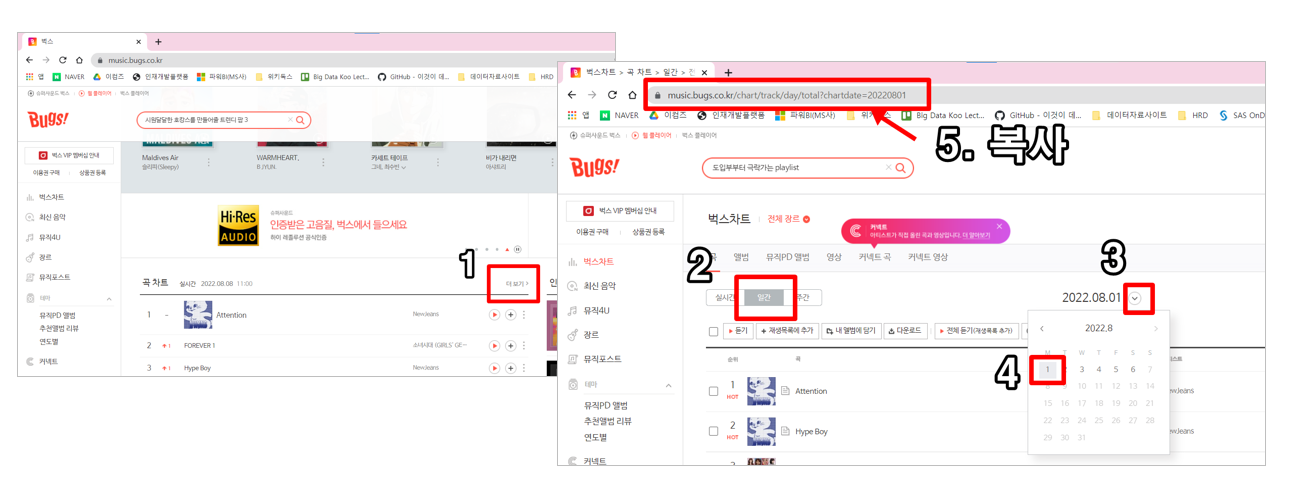

In [120]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import platform

if platform.system() == "Darwin":  # 맥
    plt.rc('font', family = "AppleGothic")
elif platform.system() == "Windows":  # 윈도우
    plt.rc('font', family = "Malgun Gothic")
elif platform.system() == "Linux":  # 리눅스 => 코랩
    plt.rc('font', family = "Nanum Gothic")


### 1. '20220801' 날짜의 1등만 가져오기

In [121]:
#'20220801'날짜의 1등만 가져오기
date='20220323'
url='https://music.bugs.co.kr/chart/track/day/total?chartdate='+str(date)

html=requests.get(url)
soup=bs(html.text,'html.parser')


table_tag=soup.find('table','list trackList byChart')
rank=table_tag.find_all('tr')[1].find('div','ranking').find('strong').text
title=table_tag.find_all('tr')[1].find('p','title').text.replace('\n','')
artist=table_tag.find_all('tr')[1].find('p','artist').text.replace('\n','')
album=table_tag.find_all('tr')[1].find('td','left').text.replace('\n','')
print(rank,title,artist,album)

1 TOMBOY (여자)아이들 (여자)아이들


### 2. '20220801' 전체 순위 가져오기

In [122]:
date='20220323'
url='https://music.bugs.co.kr/chart/track/day/total?chartdate='+str(date)

html=requests.get(url)
soup=bs(html.text,'html.parser')


table_tag=soup.find('table','list trackList byChart')
tr_tags=table_tag.find_all('tr')
res=[]
for tr in tr_tags[1:]:
    rank=tr.find('div','ranking').find('strong').text
    title=tr.find('p','title').text.replace('\n','')
    artist=tr.find('p','artist').text.replace('\n','')
    album=tr.find('td','left').text.replace('\n','')
    res.append({
        '순위':rank,
        '곡명':title,
        '아티스트':artist,
        '앨범':album
    })
df=pd.DataFrame(res)
display(df)

,순위,곡명,아티스트,앨범
0,1,TOMBOY,(여자)아이들,(여자)아이들
1,2,Feel My Rhythm,Red Velvet (레드벨벳),Red Velvet (레드벨벳)
2,3,GANADARA (Feat. 아이유),박재범,박재범
3,4,사랑인가 봐,멜로망스(MeloMance),멜로망스(MeloMance)
4,5,INVU,태연 (TAEYEON),태연 (TAEYEON)
...,...,...,...,...
95,96,Diamonds (feat. 태용 of NCT),SURAN (수란),SURAN (수란)
96,97,WA DA DA,Kep1er (케플러),Kep1er (케플러)
97,98,Stardust love song,지효 (TWICE),지효 (TWICE)
98,99,소주 한 잔,양다일,양다일


### 3. 순위에 따른 점수
- 1등 => 100점, 100등 => 1점

In [123]:
df['점수']=101-df['순위'].astype('int')

In [124]:
df

,순위,곡명,아티스트,앨범,점수
0,1,TOMBOY,(여자)아이들,(여자)아이들,100
1,2,Feel My Rhythm,Red Velvet (레드벨벳),Red Velvet (레드벨벳),99
2,3,GANADARA (Feat. 아이유),박재범,박재범,98
3,4,사랑인가 봐,멜로망스(MeloMance),멜로망스(MeloMance),97
4,5,INVU,태연 (TAEYEON),태연 (TAEYEON),96
...,...,...,...,...,...
95,96,Diamonds (feat. 태용 of NCT),SURAN (수란),SURAN (수란),5
96,97,WA DA DA,Kep1er (케플러),Kep1er (케플러),4
97,98,Stardust love song,지효 (TWICE),지효 (TWICE),3
98,99,소주 한 잔,양다일,양다일,2


### [미션] 특정 기간에 순위 크롤링
- 시작일/종료일 => 사용자로부터 입력받아 진행
- 기간 전체 순위 가져오기(2022-02-01 ~ 2022-03-23)
- 가져온 데이터는 DataFrame으로 출력하기
### [결과 화면]

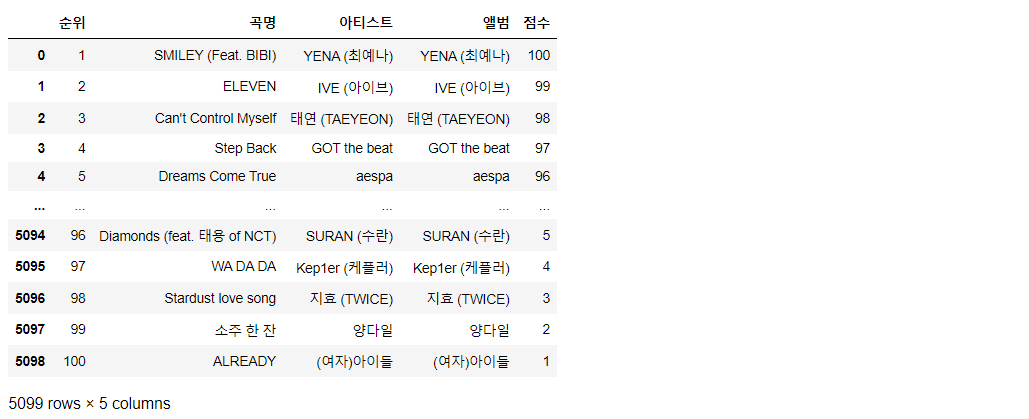

### [참고]

#### 1. 날짜 기간 가져오기
 - pd.date_range(시작일, 종료일)
 >예: pd.date_range('20220101','20220201')
   
#### 2. tadm : 진행률 프로세스바
 - 설치 : !pip install tqdm
 - from tqdm import tqdm
 - tqdm(iterable) :  iterable 내에서의 상태 진행률을 알려준다.

In [125]:
!pip install tqdm

In [126]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from tqdm import tqdm

In [127]:
#'시작일'과 '종료일' 사이 날짜 만들기 연습
pd.date_range('20220101','20220201')

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01'],
              dtype='datetime64[ns]', freq='D')

In [128]:
#tqdm  test
import time
for i in tqdm(range(10),'진행상황'):
    time.sleep(0.1)
    

진행상황: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.21it/s]


In [129]:
# 미션
시작일='20220201'
종료일='20220323'

res=[]
dates=pd.date_range(시작일, 종료일)
for date in tqdm(dates):
    url='https://music.bugs.co.kr/chart/track/day/total?chartdate='+str(date)

    html=requests.get(url)
    soup=bs(html.text,'html.parser')


    table_tag=soup.find('table','list trackList byChart')
    tr_tags=table_tag.find_all('tr')
    score=101
    for tr in tr_tags[1:]:
        score -= 1
        rank=tr.find('div','ranking').find('strong').text
        title=tr.find('p','title').text.replace('\n','')
        artist=tr.find('p','artist').text.replace('\n','')
        album=tr.find('td','left').text.replace('\n','')
        res.append({
            '날짜':date,
            '순위':rank,
            '곡명':title,
            '아티스트':artist,
            '앨범':album,
            '점수':score
        })
df_bugs=pd.DataFrame(res)
df_bugs


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:30<00:00,  1.67it/s]


,날짜,순위,곡명,아티스트,앨범,점수
0,2022-02-01,1,SMILEY (Feat. BIBI),YENA (최예나),YENA (최예나),100
1,2022-02-01,2,ELEVEN,IVE (아이브),IVE (아이브),99
2,2022-02-01,3,Can't Control Myself,태연 (TAEYEON),태연 (TAEYEON),98
3,2022-02-01,4,Step Back,GOT the beat,GOT the beat,97
4,2022-02-01,5,Dreams Come True,aespa,aespa,96
...,...,...,...,...,...,...
5094,2022-03-23,96,Diamonds (feat. 태용 of NCT),SURAN (수란),SURAN (수란),5
5095,2022-03-23,97,WA DA DA,Kep1er (케플러),Kep1er (케플러),4
5096,2022-03-23,98,Stardust love song,지효 (TWICE),지효 (TWICE),3
5097,2022-03-23,99,소주 한 잔,양다일,양다일,2


### 1. 1위 곡만 표시

In [130]:
df_bugs[df_bugs['순위']=='1']

,날짜,순위,곡명,아티스트,앨범,점수
0,2022-02-01,1,SMILEY (Feat. BIBI),YENA (최예나),YENA (최예나),100
100,2022-02-02,1,SMILEY (Feat. BIBI),YENA (최예나),YENA (최예나),100
200,2022-02-03,1,너 아니면 안돼,먼데이 키즈(Monday Kiz),먼데이 키즈(Monday Kiz),100
300,2022-02-04,1,대낮에 한 이별,선예\r선예\r,선예\r선예\r,100
400,2022-02-05,1,대낮에 한 이별,선예\r선예\r,선예\r선예\r,100
500,2022-02-06,1,대낮에 한 이별,선예\r선예\r,선예\r선예\r,100
600,2022-02-07,1,대낮에 한 이별,선예\r선예\r,선예\r선예\r,100
700,2022-02-08,1,언제나 사랑해,케이시,케이시,100
800,2022-02-09,1,언제나 사랑해,케이시,케이시,100
900,2022-02-10,1,잊을 수 있을까,노을,노을,100


### 2. 100위 안에 가장 많이 랭킹된 아티스트 10팀(명)은?

In [131]:
df_bugs['아티스트'].value_counts()[:10]

태연 (TAEYEON)     364
아이유(IU)          353
aespa            180
BE'O (비오)        173
방탄소년단            153
TREASURE(트레저)    118
김기태              117
비투비              113
이무진              107
AKMU(악뮤)          95
Name: 아티스트, dtype: int64

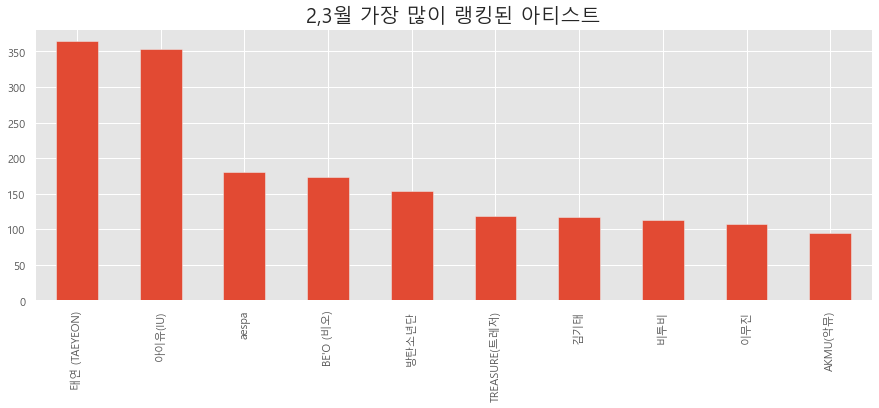

In [132]:
df_bugs['아티스트'].value_counts()[:10].plot(kind='bar',figsize=(15,5))
plt.title('2,3월 가장 많이 랭킹된 아티스트',fontsize=20)
plt.show()

### 3. 가장 많이 랭킹된 '태연'의 노래 랭킹 회수

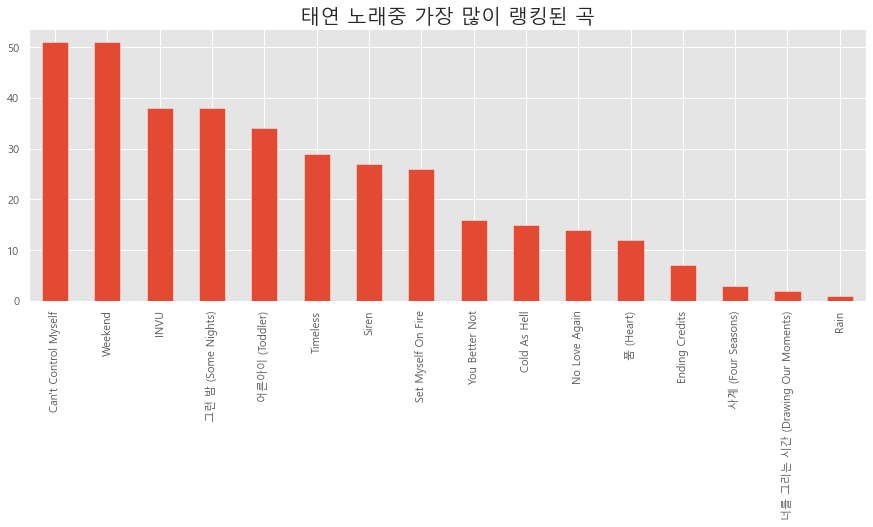

In [133]:
df_태연=df_bugs[df_bugs['아티스트'].str.contains('태연')]
df_태연['곡명'].value_counts().plot(kind='bar',figsize=(15,5))
plt.title('태연 노래중 가장 많이 랭킹된 곡', fontsize=20)
plt.show()

In [134]:
df_태연['곡명'].value_counts()

Can't Control Myself               51
Weekend                            51
INVU                               38
그런 밤 (Some Nights)                 38
어른아이 (Toddler)                     34
Timeless                           29
Siren                              27
Set Myself On Fire                 26
You Better Not                     16
Cold As Hell                       15
No Love Again                      14
품 (Heart)                          12
Ending Credits                      7
사계 (Four Seasons)                   3
너를 그리는 시간 (Drawing Our Moments)     2
Rain                                1
Name: 곡명, dtype: int64

### 4. 태연 1,2위인 Can't Control Myself와  Weekend의 일자별 '점수'변화 차트

#### 1. 문자 -> 날짜, 날짜-> 문자 (datetime 모듈 활용)

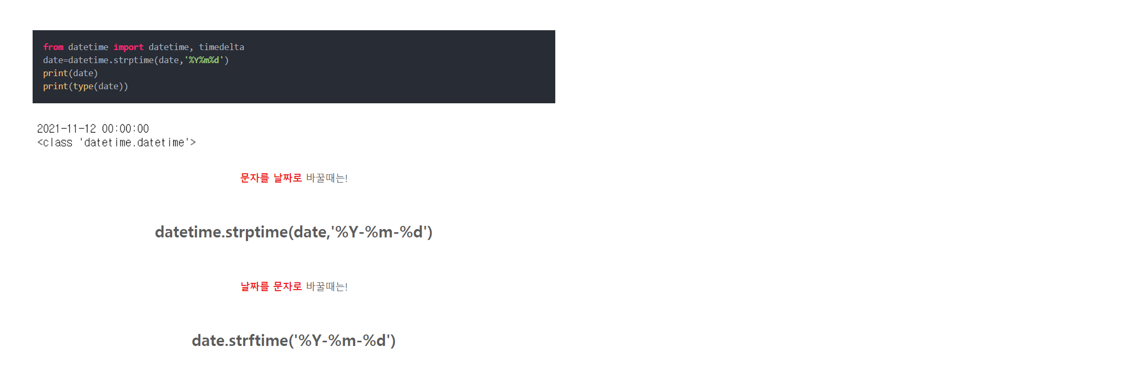


#### 2. 판다스 : to_datetime() 함수를 이용한 방법
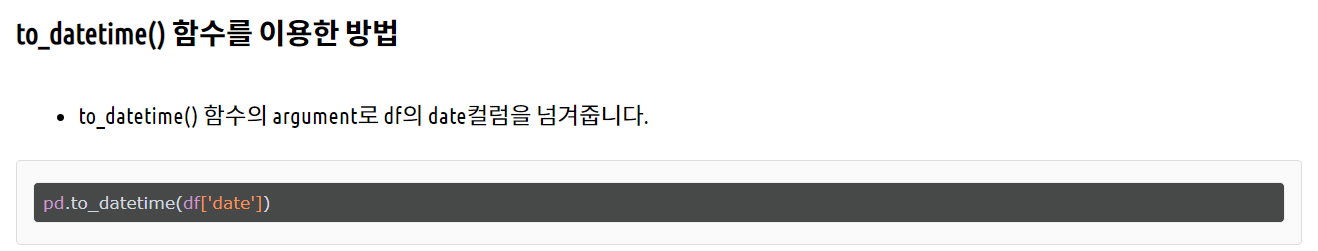

In [135]:
#문자로 되어 있는 날짜 데이터를 날짜로 변환하기
df_bugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      5099 non-null   datetime64[ns]
 1   순위      5099 non-null   object        
 2   곡명      5099 non-null   object        
 3   아티스트    5099 non-null   object        
 4   앨범      5099 non-null   object        
 5   점수      5099 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 239.1+ KB


<AxesSubplot:xlabel='날짜'>

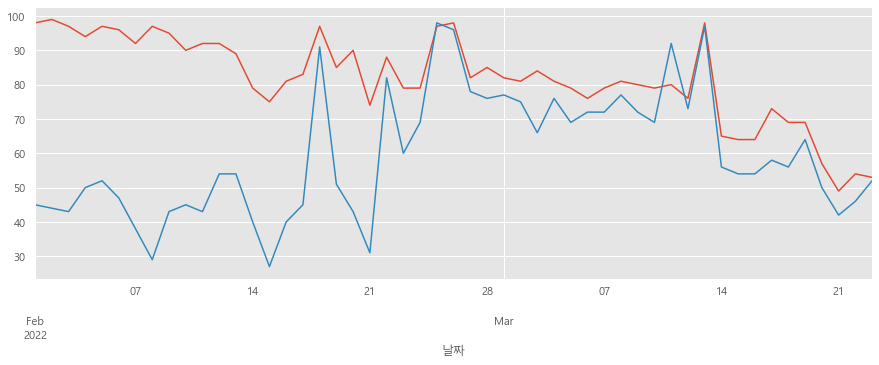

In [136]:
df_myself=df_bugs[df_bugs['곡명']=="Can't Control Myself"].set_index('날짜')
df_weekend=df_bugs[df_bugs['곡명']=="Weekend"].set_index('날짜')

df_myself['점수'].plot(figsize=(15,5))
df_weekend['점수'].plot()

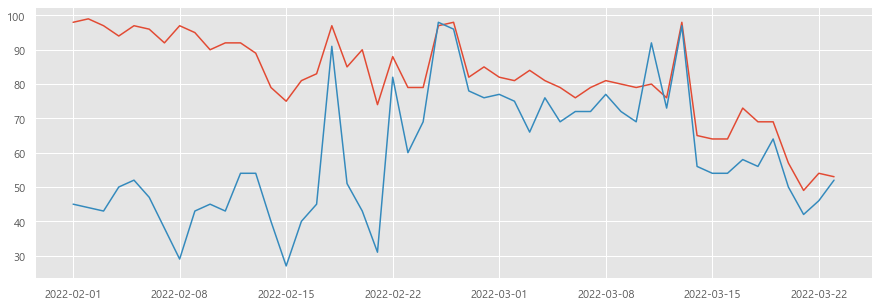

In [137]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.plot(df_myself.index, df_myself['점수'])
plt.plot(df_weekend.index, df_weekend['점수'])
plt.show()

In [69]:
df_bugs.groupby(['아티스트','곡명'])[['점수']].sum().reset_index().sort_values('점수',ascending=False).head(30)

,아티스트,곡명,점수
114,YENA (최예나),SMILEY (Feat. BIBI),4652
40,GAYLE,[19금]abcdefu,4479
42,IVE (아이브),ELEVEN,4452
141,김민석 (멜로망스),취중고백,4348
41,GOT the beat,Step Back,4203
334,태연 (TAEYEON),Can't Control Myself,4173
47,Kelly Clarkson(켈리 클락슨),Stronger (What Doesn't Kill You),4144
251,아이유(IU),드라마,4139
307,임영웅,사랑은 늘 도망가,4111
116,aespa,Dreams Come True,3860


### [미션] 1. 아티스트(아이유)의 곡들에 대한 일자별 순위 변화 차트
- 곡 하나당 차트 하나
- 차트 하나에 모든 곡 표

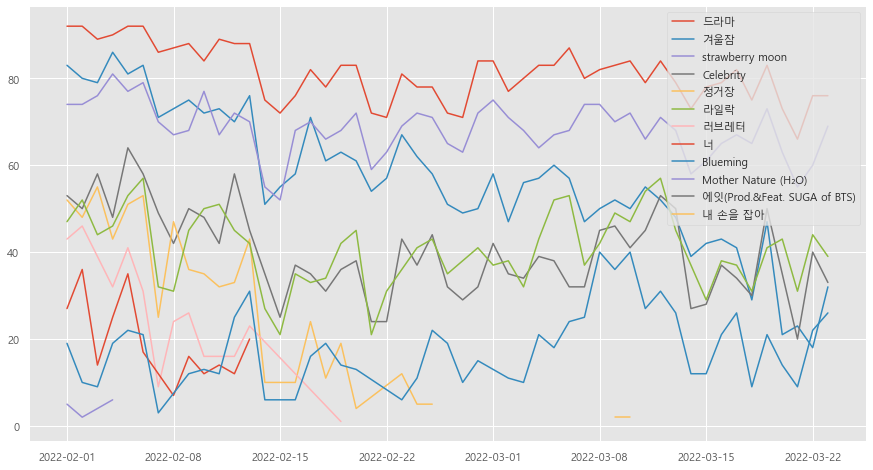

In [163]:
df_아이유=df_bugs[df_bugs['아티스트'].str.contains('아이유')]
iu_ms=df_아이유['곡명'].unique()
plt.figure(figsize=(15,8))
for i in iu_ms:
    cond=df_아이유['곡명']==i
    plt.plot(df_아이유[cond]['날짜'],df_아이유[cond]['점수'],label=i)
    plt.legend()


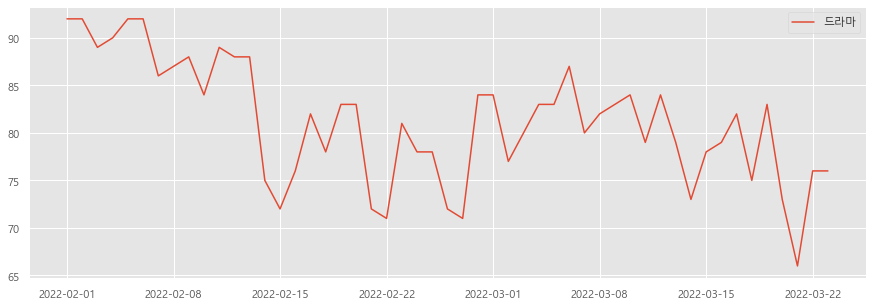

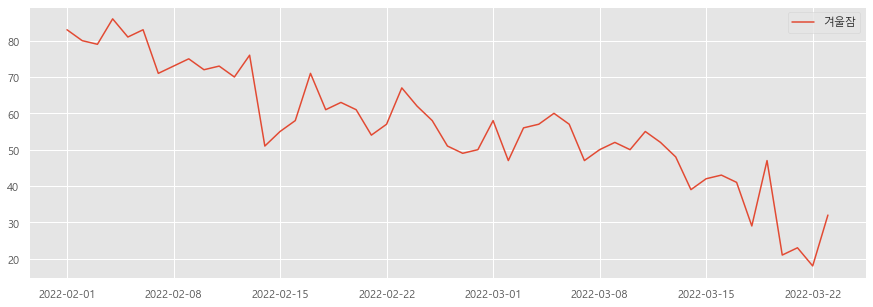

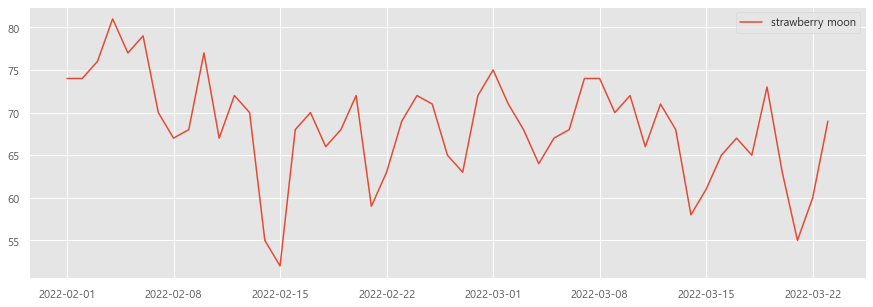

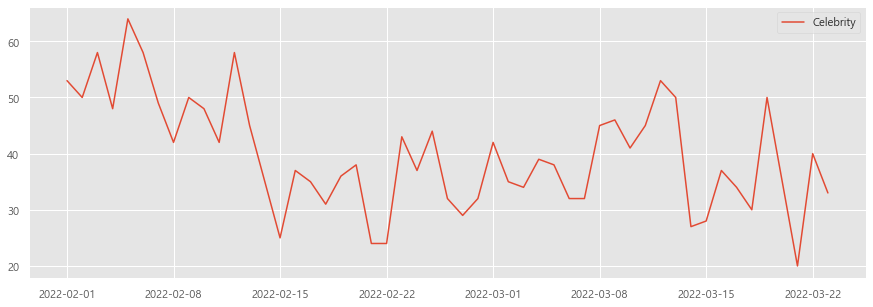

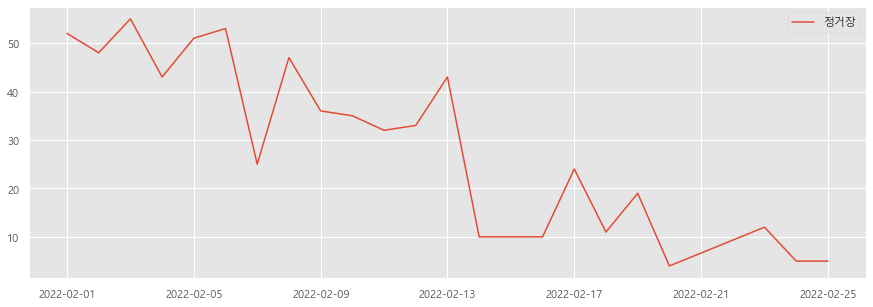

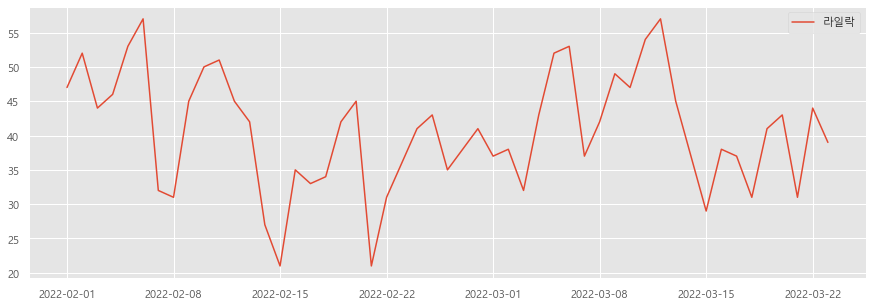

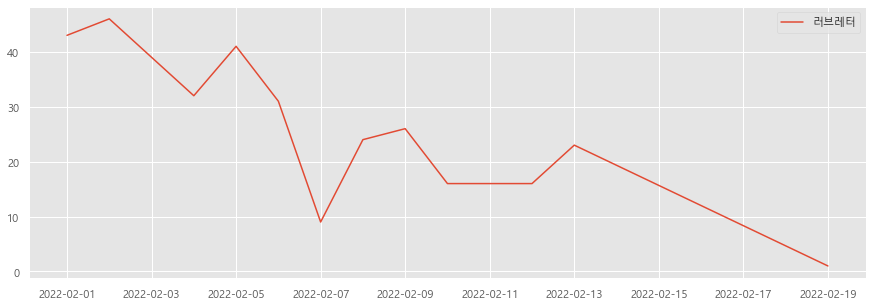

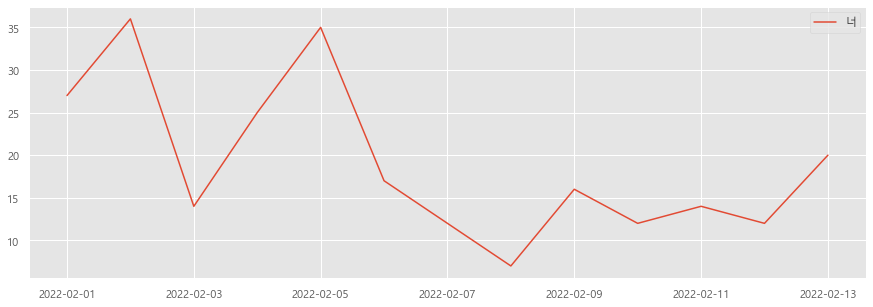

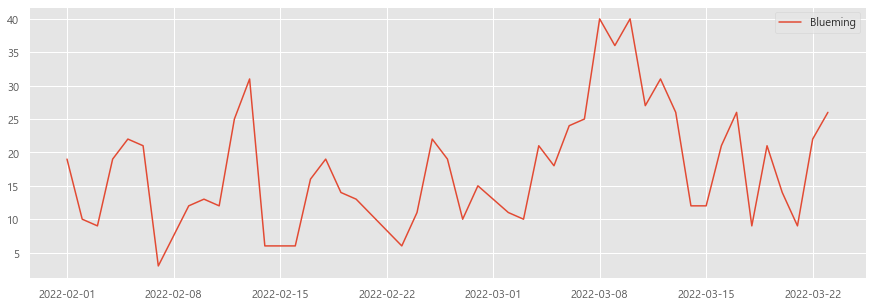

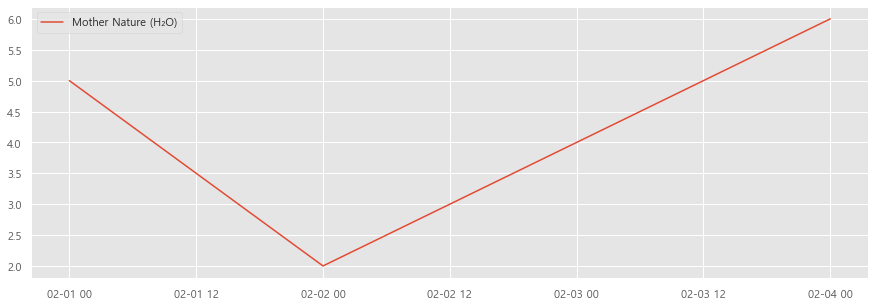

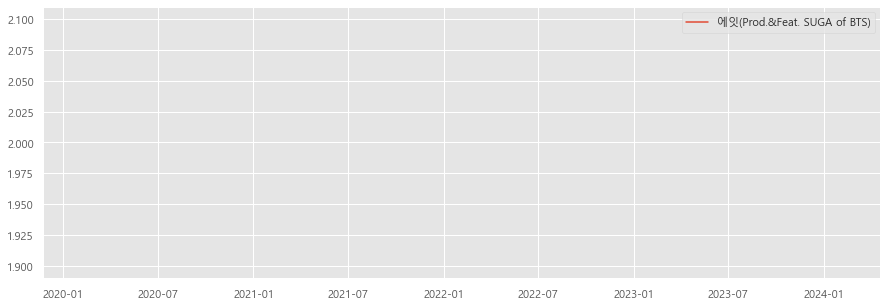

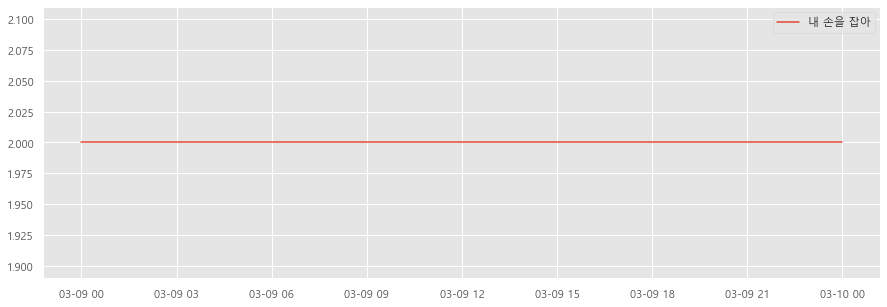

In [164]:
df_아이유=df_bugs[df_bugs['아티스트'].str.contains('아이유')]
iu_ms=df_아이유['곡명'].unique()

for i in iu_ms:
    cond=df_아이유['곡명']==i
    plt.figure(figsize=(15,5))
    plt.plot(df_아이유[cond]['날짜'],df_아이유[cond]['점수'],label=i)
    plt.legend()

### [미션] '아티스트'와 '곡명'을 입력받아 변화 차트를 작성하시오